In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

Reading the data from the csv file

In [3]:
df = pd.read_csv('house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.columns.nunique()

9

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


Visualizing the data

<AxesSubplot:>

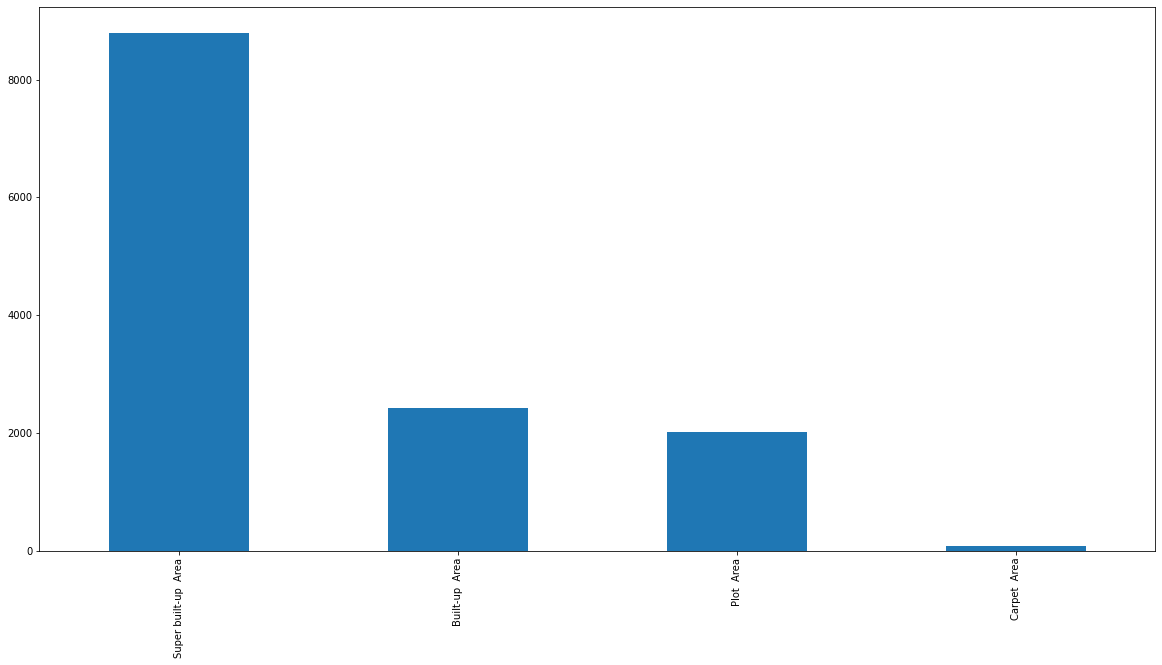

In [13]:
df.area_type.value_counts().plot(kind='bar')

Now removing the un necessary data in the datasets

In [14]:
df2 = df.drop(['society', 'balcony'], axis=1)
df2.head()

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df2.shape

(13320, 7)

In [16]:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [17]:
df3 = df2.dropna()

In [18]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [19]:
df3.shape

(13246, 7)

In [20]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [21]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6752\2835883509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [23]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [24]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [25]:
df3[df3.bhk > 20]

,area_type,availability,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [26]:
## think  that's error because 43 bedrooms with the total_sqft of 2400 seems not good so let's check the total_sqft
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Extracting Only Float Val or Only String Val
## Function to extract only float value, other values will be replaced as NaNs.

In [27]:
def float_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
df3[df3['total_sqft'].apply(float_num)].head(8) ### Here it returns the true vlues in the float_num

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,38.00,2
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,600.00,4


In [30]:
df3[~df3['total_sqft'].apply(float_num)].head(8) 

,area_type,availability,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,265.000,9


In [31]:
def convert_to_float(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0]) + float(values[1]))/2
    try:
        return float(x)
    except:
        return None
    
        

In [32]:
convert_to_float('2100')

2100.0

In [33]:
convert_to_float('10 - 10')

10.0

In [34]:
(10 + 10) / 2

10.0

In [35]:
convert_to_float('34.46Sq. Meter')

In [36]:
df3.head(3)

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [37]:
df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(convert_to_float)
df4.head(3)

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [38]:
df4.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      46
bath             0
price            0
bhk              0
dtype: int64

In [39]:
df4 = df4[df4.total_sqft.notnull()]


In [40]:
df4.shape

(13200, 8)

In [41]:
df4.loc[122] 

area_type       Super built-up  Area
availability                  18-Mar
location                      Hebbal
size                           4 BHK
total_sqft                    5611.5
bath                             4.0
price                          477.0
bhk                                4
Name: 122, dtype: object

In [42]:
(3067 + 8156) /2

5611.5

In [43]:
df4.shape

(13200, 8)

## Featuring Engineering

In [44]:
df4.head(3)

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [45]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [46]:
df5['location'].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [47]:
len(df5['location'].unique())

1298

## For Categorial Data
using the concept of dimensolity reduction
SInce there are 1298 unique values in the location columns if we try to to dummies then we will have 1298 columns and this will
be very difficult

In [48]:
df5.location = df5.location.apply(lambda x: x.lower())
location_stats = df5['location'].value_counts(ascending=True)
location_stats

abshot layout        1
nti layout           1
fraser town          1
sonam layout         1
prakruthi nagar      1
                  ... 
thanisandra        232
kanakpura road     264
electronic city    302
sarjapur  road     392
whitefield         532
Name: location, Length: 1288, dtype: int64

In [49]:
len(location_stats[location_stats<=10])


1048

## Since there are about 1047 values which is less than 10 we kept this values in the seperate columns other

In [50]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

abshot layout        1
nti layout           1
fraser town          1
sonam layout         1
prakruthi nagar      1
                    ..
dodsworth layout    10
sadashiva nagar     10
naganathapura       10
ganga nagar         10
thyagaraja nagar    10
Name: location, Length: 1048, dtype: int64

In [51]:
len(df5.location.unique())

1288

In [52]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x) 
len(df5.location.unique())

241

In [53]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# checking outliers in total_sqfeet

In [54]:
df5['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [55]:
m=np.mean(df5.price_per_sqft)
st=np.std(df5.price_per_sqft)

In [56]:
df6=df5[(df5.price_per_sqft>(m-st)) & (df5.price_per_sqft< (m+st))]

In [57]:
df6.shape

(13193, 9)

In [58]:
df6.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# outlier removal with interquartile range

In [59]:
df6['bhk'].describe()

count    13193.000000
mean         2.800424
std          1.292252
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [60]:
lower_limt=np.nanpercentile(df6['bhk'],2)
upper_limit=np.nanpercentile(df6['bhk'],99.95)

In [61]:
np.nanpercentile(df6['bhk'],0.5)

1.0

In [62]:
df7=df6[df6['bhk'].between(0,upper_limit)]

In [63]:
print(df6.shape)
print(df7.shape)

(13193, 9)
(13186, 9)


In [64]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## bathroom check

In [65]:
df7['bath'].describe()

count    13186.000000
mean         2.681329
std          1.256095
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: bath, dtype: float64

In [66]:
df7[df7.bath > 10]

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
938,Plot Area,Ready To Move,5th phase jp nagar,9 Bedroom,1260.0,11.0,290.0,9,23015.873016
1078,Plot Area,Ready To Move,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1768,Plot Area,Ready To Move,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
1953,Plot Area,Ready To Move,kr puram,8 Bedroom,1200.0,12.0,110.0,8,9166.666667
1979,Plot Area,Ready To Move,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
3096,Super built-up Area,Ready To Move,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6937,Plot Area,Ready To Move,5th block hbr layout,9 Bedroom,2600.0,12.0,675.0,9,25961.538462
7979,Super built-up Area,Ready To Move,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8106,Plot Area,Ready To Move,other,8 Bedroom,1850.0,12.0,300.0,8,16216.216216
8636,Super built-up Area,Ready To Move,neeladri nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [67]:
df8=df7[df7.bath < df7.bhk+2]

In [76]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,3,19-Dec,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,2,31-Dec,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,0,31-Dec,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,31-Dec,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,3,31-Dec,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df8.iloc[:,0]=le.fit_transform(df8.iloc[:,0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6752\1690733224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.iloc[:,0]=le.fit_transform(df8.iloc[:,0])


In [78]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,3,19-Dec,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,2,31-Dec,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,0,31-Dec,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,31-Dec,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,3,31-Dec,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [101]:
df8['availability'].replace(['Ready To Move','Immediate Possession'],["31-Dec","31-Dec"],regex=False,inplace=True)

In [102]:
df8.groupby('availability')['availability'].agg('count')

availability
14-Jul        1
14-Nov        1
15-Aug        1
15-Dec        1
15-Jun        1
          ...  
22-Jun       19
22-Mar        3
22-May        6
22-Nov        2
31-Dec    10381
Name: availability, Length: 80, dtype: int64

In [103]:
df8[['Day','Month']] =df8.availability.str.split('-',expand=True)

In [104]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft,Day,Month
0,3,19-Dec,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606,19,Dec
1,2,31-Dec,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,31,Dec
2,0,31-Dec,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,31,Dec
3,3,31-Dec,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,31,Dec
4,3,31-Dec,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,31,Dec


In [105]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13012 non-null  int64  
 1   availability    13012 non-null  object 
 2   location        13012 non-null  object 
 3   size            13012 non-null  object 
 4   total_sqft      13012 non-null  float64
 5   bath            13012 non-null  float64
 6   price           13012 non-null  float64
 7   bhk             13012 non-null  int64  
 8   price_per_sqft  13012 non-null  float64
 9   Day             13012 non-null  object 
 10  Month           13012 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


In [106]:
#df8 = df8["Month"=="Dec"].astype("object")

In [108]:
df8 = df8.astype({"Day":"int"})

In [109]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13012 non-null  int64  
 1   availability    13012 non-null  object 
 2   location        13012 non-null  object 
 3   size            13012 non-null  object 
 4   total_sqft      13012 non-null  float64
 5   bath            13012 non-null  float64
 6   price           13012 non-null  float64
 7   bhk             13012 non-null  int64  
 8   price_per_sqft  13012 non-null  float64
 9   Day             13012 non-null  int32  
 10  Month           13012 non-null  object 
dtypes: float64(4), int32(1), int64(2), object(4)
memory usage: 1.1+ MB


In [110]:
df8['location'].nunique()

241

In [111]:
dummies=pd.get_dummies(df8.location)
dummies.head()

,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
dummies1=pd.get_dummies(df8.Month)
dummies1.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [113]:
df9=pd.concat([df8,dummies,dummies1],axis='columns')

In [114]:
df10=df9.drop(['location','size','Month','other','bath','availability'],axis='columns')
df10.head()

,area_type,total_sqft,price,bhk,price_per_sqft,Day,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,3,1056.0,39.07,2,3699.810606,19,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,2600.0,120.00,4,4615.384615,31,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1440.0,62.00,3,4305.555556,31,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,1521.0,95.00,3,6245.890861,31,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,1200.0,51.00,2,4250.000000,31,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [115]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13012 non-null  int64  
 1   availability    13012 non-null  object 
 2   location        13012 non-null  object 
 3   size            13012 non-null  object 
 4   total_sqft      13012 non-null  float64
 5   bath            13012 non-null  float64
 6   price           13012 non-null  float64
 7   bhk             13012 non-null  int64  
 8   price_per_sqft  13012 non-null  float64
 9   Day             13012 non-null  int32  
 10  Month           13012 non-null  object 
dtypes: float64(4), int32(1), int64(2), object(4)
memory usage: 1.1+ MB


In [116]:
df8 = df8.astype({"Day":"int"})

In [117]:
df8.corr()

,area_type,total_sqft,bath,price,bhk,price_per_sqft,Day
area_type,1.000000,-0.057002,-0.119852,-0.066924,-0.136711,-0.092989,-0.129359
total_sqft,-0.057002,1.000000,0.383576,0.569221,0.347388,0.135740,0.025476
bath,-0.119852,0.383576,1.000000,0.456694,0.895153,0.437836,0.081234
price,-0.066924,0.569221,0.456694,1.000000,0.416417,0.668064,0.041053
bhk,-0.136711,0.347388,0.895153,0.416417,1.000000,0.433989,0.107264
price_per_sqft,-0.092989,0.135740,0.437836,0.668064,0.433989,1.000000,0.093310
Day,-0.129359,0.025476,0.081234,0.041053,0.107264,0.093310,1.000000


# Model Building

In [118]:
X=df10.drop('price',axis='columns')
y=df10.price

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [120]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [121]:
lrmodel.score(X_test,y_test)

0.7190114364942338

# K-fold Cross Validation

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.30,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.71901144, 0.53262193, 0.68657616, 0.68684434, 0.70558093])

In [123]:
from sklearn.tree import DecisionTreeRegressor
Regressor=DecisionTreeRegressor()

In [124]:
Regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [125]:
Regressor.score(X_test,y_test)

0.9818801070374571

In [126]:
from sklearn.ensemble import RandomForestRegressor
RRegressor=RandomForestRegressor()
RRegressor.fit(X_train,y_train)
RRegressor.score(X_test,y_test)

0.978566190939582